1. Sample $10^4$ points uniformly over the hypercube $[0,1]^d$ (denote this set by $\mathcal X$).
2. For $d\in\{1,2,3,5,10,20,50,100,500\}$ and for the Euclidean distance $\rho$ find
- $\min d(x,\tilde x)$: minimum over $x,\tilde x\in \mathcal X$
- $\overline{d(x,\tilde x)}$: average over $x,\tilde x\in \mathcal X$
- $\max d(x,\tilde x)$: maximum over $x,\tilde x\in \mathcal X$
- $\overline{d_{NN1}(x)}$: average distance to the nearest neighbor
- $ \max d_{NN1}(x)$: maximal distance to the nearest neigbor 

Collect the results in a table

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm

In [94]:
# Part 1,2

n = 10**4
arr_d = [1,2,3,5,10,20,50,100,500]
# arr_d = [2]
df=pd.DataFrame(columns=['d', 'min', 'mean', 'max', 'mean_nearest', 'max_nearest'])
for d in arr_d:
    X=np.random.uniform(0,1,(n,d))
    # print(X)
    D = euclidean_distances(X, X)
    # print(D)
    D = np.sort(D)
    # print(D)
    D = D[:,1:]
    # print(D)
    min_value = D.min()
    max_value = D.max()
    mean_value = D.mean()
    
    mean_nearest = np.amin(D,axis=1).mean()
    max_nearest = np.amin(D,axis=1).max()
    # print(min_value, max_value, mean_value, mean_nearest, max_nearest)
    df = df.append({
        'd': d, 
        'min': min_value, 
        'mean': mean_value, 
        'max': max_value, 
        'mean_nearest': mean_nearest, 
        'max_nearest': max_nearest
    }, ignore_index=True)
df=df.astype({'d': 'int32'})

print(df)


     d       min      mean        max  mean_nearest  max_nearest
0    1  0.000000  0.333292   0.999931      0.000050     0.000449
1    2  0.000077  0.519422   1.405812      0.004969     0.018390
2    3  0.001369  0.663061   1.668004      0.026174     0.065243
3    5  0.024797  0.878987   2.034004      0.109299     0.221445
4   10  0.157854  1.267376   2.465248      0.388773     0.628519
5   20  0.604429  1.808727   3.060549      0.897691     1.219438
6   50  1.554001  2.875949   4.170821      1.969747     2.325993
7  100  2.737401  4.073095   5.330914      3.179128     3.564685
8  500  7.719249  9.126709  10.643264      8.250463     8.673473


3. Generate $10^4$ point such that each point with probability $1/2$
- is sampled from $N(\mu,I)$, $\mu=(a,\dots,a)\in\mathbb R^d$ and gets label $0$
- is sampled from $N(\mu,I)$, $\mu=(-a,\dots,-a)\in\mathbb R^d$ and gets label $1$

Put $a=\frac{2}{\sqrt{d}}$ (the Bayes error will be $\approx 0.023$ for all $d$). 

For $k = 3, 7, 15$  train a $k$-NN classifier for increasing dimensions $1\le d\le 500$ and monitor its performance evaluated by 10 times repeated 10-fold CV. For each $k$ draw the graphs of the mean  missclassification error as a function of $d$.

100%|██████████| 6/6 [00:31<00:00,  5.18s/it]


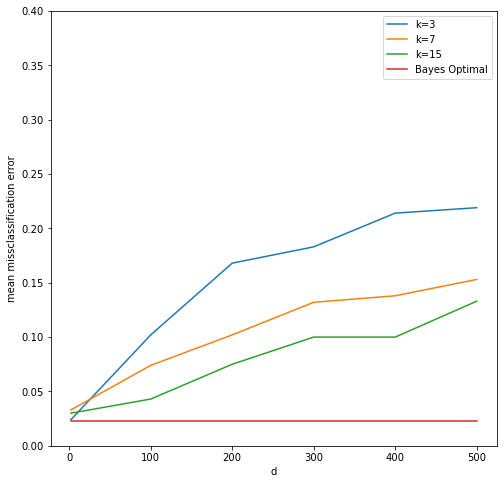

In [69]:
np.random.seed(42)
n = 10**3


fig, ax = plt.subplots(1,1, figsize=(8, 8))
plt.ylim([0, 0.4])
ax.set_xlabel('d')
ax.set_ylabel('mean missclassification error')

arr_k = [3,7,15]
arr_d = [2,100,200,300,400,500]
for k in arr_k:
    res = []
    for d in tqdm(arr_d):
        a =[ 2.0/np.sqrt(d) for i in range(d)]
        XX=np.random.randn(n, d)
        X0 = XX + a
        X1 = XX - a
        Y = np.zeros((n, d))+np.random.randint(0,2,(n,1))
        X = X0*(Y==1) + X1*(Y==0)
        
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X, Y, cv=10)
        res.append(np.mean(1 - scores))
    ax.plot(arr_d, res, label='k='+str(k))
    ax.legend(loc=0)

ax.plot(arr_d, [0.023 for i in range(len(arr_d))], label='Bayes Optimal')
ax.legend(loc=0)


100%|██████████| 6/6 [04:58<00:00, 49.78s/it]


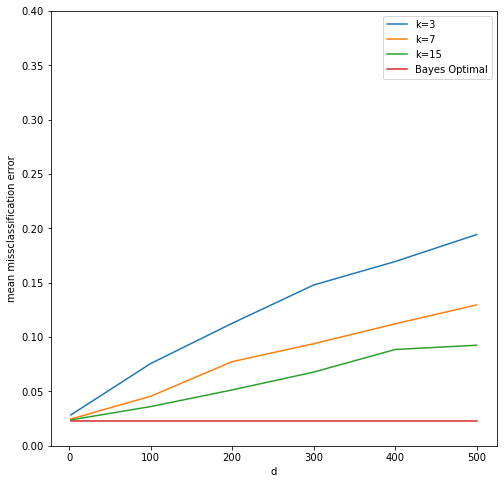

In [70]:
np.random.seed(42)
n = 10**4


fig, ax = plt.subplots(1,1, figsize=(8, 8))
plt.ylim([0, 0.4])
ax.set_xlabel('d')
ax.set_ylabel('mean missclassification error')

arr_k = [3,7,15]
arr_d = [2,100,200,300,400,500]
for k in arr_k:
    res = []
    for d in tqdm(arr_d):
        a =[ 2.0/np.sqrt(d) for i in range(d)]
        XX=np.random.randn(n, d)
        X0 = XX + a
        X1 = XX - a
        Y = np.zeros((n, d))+np.random.randint(0,2,(n,1))
        X = X0*(Y==1) + X1*(Y==0)
        
        clf = KNeighborsClassifier(n_neighbors = k)
        scores = cross_val_score(clf, X, Y, cv=10)
        res.append(np.mean(1 - scores))
    ax.plot(arr_d, res, label='k='+str(k))
    ax.legend(loc=0)

ax.plot(arr_d, [0.023 for i in range(len(arr_d))], label='Bayes Optimal')
ax.legend(loc=0)